# Imports e leitura do csv

In [1]:
# Importing libraries
import warnings
warnings.filterwarnings('ignore')

import io
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.linear_model import LogisticRegression
!pip install scikit-plot
import scikitplot as skplt

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier

!pip install parameter-sherpa
from sklearn.model_selection import cross_val_score
import time
import sherpa
import sherpa.algorithms.bayesian_optimization as bayesian_optimization

%matplotlib inline

In [2]:
# Reading csv, dropping INDEX column and peeking at data
df = pd.read_csv('TRNcod.csv')
df = df.drop(columns = ['INDEX'])
print(df.shape)
df.head()

(389196, 245)


,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
0,1,1,1,0,0,0,0,0.135098,1,0.222222,...,0,0,1,1,0,1,1,1,0,1
1,1,0,1,0,0,1,0,0.273504,1,0.111111,...,0,1,0,1,1,0,0,0,1,0
2,1,0,1,0,0,1,0,0.281910,0,1.000000,...,1,1,0,0,0,0,1,0,1,0
3,1,1,1,0,0,0,0,0.225741,0,0.111111,...,1,1,0,1,1,0,1,0,1,0
4,1,1,0,0,0,1,0,0.480403,0,0.111111,...,1,1,1,0,0,1,0,1,1,0


# Mixer de dados

In [3]:
#separando os dados da classe IND_BOM_1_1
dfClass1 = df[df['IND_BOM_1_1']==1]
print(dfClass1.shape)
dfClass1.head()

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


(255098, 245)


,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
1,1,0,1,0,0,1,0,0.273504,1,0.111111,...,0,1,0,1,1,0,0,0,1,0
2,1,0,1,0,0,1,0,0.281910,0,1.000000,...,1,1,0,0,0,0,1,0,1,0
3,1,1,1,0,0,0,0,0.225741,0,0.111111,...,1,1,0,1,1,0,1,0,1,0
4,1,1,0,0,0,1,0,0.480403,0,0.111111,...,1,1,1,0,0,1,0,1,1,0
5,0,1,1,0,0,0,1,0.219323,0,0.111111,...,0,1,1,0,1,0,0,1,1,0


In [4]:
#separando os dados da classe IND_BOM_1_2
dfClass2 = df[df['IND_BOM_1_2']==1]
print(dfClass2.shape)
dfClass2.head()

(134098, 245)


,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
0,1,1,1,0,0,0,0,0.135098,1,0.222222,...,0,0,1,1,0,1,1,1,0,1
10,1,0,1,1,0,0,0,0.654703,0,0.111111,...,0,1,0,1,0,0,0,0,0,1
11,1,1,1,0,0,0,0,0.097444,1,0.111111,...,0,1,0,1,0,1,0,1,0,1
12,1,0,1,0,1,0,0,0.398961,0,0.111111,...,1,1,1,0,1,0,0,0,0,1
17,1,1,1,0,0,0,0,0.142254,0,0.111111,...,1,0,0,1,0,1,0,1,0,1


In [5]:
#porcentagem de cada classe do DF
print(dfClass1.shape[0]/df.shape[0])
print(dfClass2.shape[0]/df.shape[0])

0.6554486685371895
0.34455133146281053


In [6]:
#dividindo o dataframe da classe 1 em 50% treinamento e 50% teste
from sklearn.model_selection import train_test_split
class1_train, class1_test = train_test_split(dfClass1, test_size = 0.5, random_state = 2)

print("class1_train shape: {}".format(class1_train.shape))
print("class1_test shape: {}".format(class1_test.shape))

class1_train shape: (127549, 245)
class1_test shape: (127549, 245)


In [7]:
#dividindo o dataframe de teste da classe 1 em 25% teste e 25% validação
class1_test, class1_validation = train_test_split(class1_test, test_size = 0.5, random_state =2)

print("class1_test shape: {}".format(class1_test.shape))
print("class1_validation shape: {}".format(class1_validation.shape))

class1_test shape: (63774, 245)
class1_validation shape: (63775, 245)


In [8]:
#repetindo as divisões para a classe 2
class2_train, class2_test = train_test_split(dfClass2, test_size = 0.5, random_state = 2)

print("class2_train shape: {}".format(class2_train.shape))
print("class2_test shape: {}".format(class2_test.shape))

class2_train shape: (67049, 245)
class2_test shape: (67049, 245)


In [9]:
class2_test, class2_validation = train_test_split(class2_test, test_size = 0.5, random_state = 2)

In [10]:
print(class2_test.shape)
print(class2_validation.shape)

(33524, 245)
(33525, 245)


In [11]:
#aumentando o dataframe de treinamento da classe minoritária para o dobro do seu tamanho utilizando de repetição
while (class2_train.shape[0] < class1_train.shape[0]):
    class2_train = class2_train.append(class2_train)

print(class2_train.shape)

(134098, 245)


In [12]:
#removendo dados excedentes
class2_train = class2_train.head(class1_train.shape[0])
print(class1_train.shape[0])
print(class2_train.shape[0])

127549
127549


In [13]:
#repetindo o processo para o dataframe de validação
while (class2_validation.shape[0] < class1_validation.shape[0]):
    class2_validation = class2_validation.append(class2_validation)

print(class2_validation.shape)

(67050, 245)


In [14]:
class2_validation = class2_validation.head(class1_validation.shape[0])
print(class1_validation.shape[0])
print(class2_validation.shape[0])

63775
63775


In [15]:
validation_X = class2_validation.append(class1_validation).sample(frac=1)
train_X = class2_train.append(class1_train).sample(frac=1)
test_X = class2_test.append(class1_test).sample(frac=1)

In [16]:
print(validation_X.shape[0])
print(train_X.shape[0])
print(test_X.shape[0])

127550
255098
97298


In [17]:
# Transformando IND_BOM_1_1 e IND_BOM_1_2 (que são mutualmente exclusivos em uma unica medida, BOM)
# BOM = 0 means IND_BOM_1_1 = 1
# BOM = 1 means IND_BOM_1_2 = 1

validation_Y = validation_X[["IND_BOM_1_1", "IND_BOM_1_2"]]
validation_X = validation_X.drop(['IND_BOM_1_1'], axis=1)
validation_X = validation_X.drop(['IND_BOM_1_2'], axis=1)
validation_Y['BOM'] = validation_Y["IND_BOM_1_2"]
validation_Y = validation_Y.drop(['IND_BOM_1_1'], axis=1)
validation_Y = validation_Y.drop(['IND_BOM_1_2'], axis=1)

train_Y = train_X[["IND_BOM_1_1", "IND_BOM_1_2"]]
train_X = train_X.drop(['IND_BOM_1_1'], axis=1)
train_X = train_X.drop(['IND_BOM_1_2'], axis=1)
train_Y['BOM'] = train_Y["IND_BOM_1_2"]
train_Y = train_Y.drop(['IND_BOM_1_1'], axis=1)
train_Y = train_Y.drop(['IND_BOM_1_2'], axis=1)

test_Y = test_X[["IND_BOM_1_1", "IND_BOM_1_2"]]
test_X = test_X.drop(['IND_BOM_1_1'], axis=1)
test_X = test_X.drop(['IND_BOM_1_2'], axis=1)
test_Y['BOM'] = test_Y["IND_BOM_1_2"]
test_Y = test_Y.drop(['IND_BOM_1_1'], axis=1)
test_Y = test_Y.drop(['IND_BOM_1_2'], axis=1)

# exemple:
validation_Y

,BOM
85361,0
86688,0
5221,0
9216,1
306425,0
...,...
381785,0
140210,0
213449,0
233260,0


In [18]:
# Funções para plotting e etc

def extract_final_losses(history):
    """Função para extrair o melhor loss de treino e validação.
    
    Argumento(s):
    history -- Objeto retornado pela função fit do keras.
    
    Retorno:
    Dicionário contendo o melhor loss de treino e de validação baseado 
    no menor loss de validação.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    idx_min_val_loss = np.argmin(val_loss)
    return {'train_loss': train_loss[idx_min_val_loss], 'val_loss': val_loss[idx_min_val_loss]}

def plot_training_error_curves(history):
    """Função para plotar as curvas de erro do treinamento da rede neural.
    
    Argumento(s):
    history -- Objeto retornado pela função fit do keras.
    
    Retorno:
    A função gera o gráfico do treino da rede e retorna None.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    fig, ax = plt.subplots()
    ax.plot(train_loss, label='Train')
    ax.plot(val_loss, label='Validation')
    ax.set(title='Training and Validation Error Curves', xlabel='Epochs', ylabel='Loss (MSE)')
    ax.legend()
    plt.show()

def compute_performance_metrics(y, y_pred_class, y_pred_scores=None):
    accuracy = accuracy_score(y, y_pred_class)
    recall = recall_score(y, y_pred_class)
    precision = precision_score(y, y_pred_class)
    f1 = f1_score(y, y_pred_class)
    performance_metrics = (accuracy, recall, precision, f1)
    if y_pred_scores is not None:
        skplt.metrics.plot_ks_statistic(y, y_pred_scores)
        plt.show()
        y_pred_scores = y_pred_scores[:, 1]
        auroc = roc_auc_score(y, y_pred_scores)
        aupr = average_precision_score(y, y_pred_scores)
        performance_metrics = performance_metrics + (auroc, aupr)
    return performance_metrics

def print_metrics_summary(accuracy, recall, precision, f1, auroc=None, aupr=None):
    print()
    print("{metric:<18}{value:.4f}".format(metric="Accuracy:", value=accuracy))
    print("{metric:<18}{value:.4f}".format(metric="Recall:", value=recall))
    print("{metric:<18}{value:.4f}".format(metric="Precision:", value=precision))
    print("{metric:<18}{value:.4f}".format(metric="F1:", value=f1))
    if auroc is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUROC:", value=auroc))
    if aupr is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUPR:", value=aupr))

## MODELS

GradientBoosting:

      Iter       Train Loss   Remaining Time 
         1           1.3740           10.52m
         2           1.3640           10.31m
         3           1.3553           10.19m
         4           1.3483           10.09m
         5           1.3421            9.99m
         6           1.3364            9.88m
         7           1.3309            9.78m
         8           1.3268            9.68m
         9           1.3228            9.57m
        10           1.3189            9.50m
        11           1.3156            9.41m
        12           1.3126            9.31m
        13           1.3081            9.20m
        14           1.3056            9.09m
        15           1.3033            8.99m
        16           1.3014            8.87m
        17           1.2987            8.76m
        18           1.2965            8.66m
        19           1.2948            8.55m
        20           1.2931            8.44m
        21           1.2906            8.33m
        2

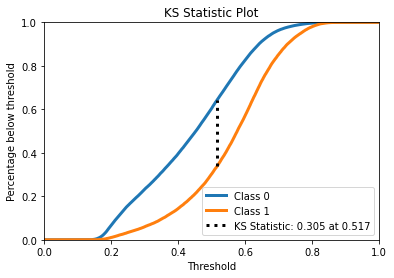


Accuracy:         0.6509
Recall:           0.6975
Precision:        0.6380
F1:               0.6664
AUROC:            0.7091
AUPR:             0.6922


In [19]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(verbose=2)  # Modifique aqui os hyperparâmetros
gb_clf.fit(train_X, train_Y)
gb_pred_class = gb_clf.predict(validation_X)
gb_pred_scores = gb_clf.predict_proba(validation_X)
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(validation_Y, gb_pred_class, gb_pred_scores)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

GradientBoosting tuning com Sherpa


In [20]:
from tensorflow import keras
from tensorflow.keras import layers

parameters = [sherpa.Discrete('n_estimators', [100, 1750]),
              sherpa.Discrete('max_depth', [2, 7]),
              sherpa.Discrete('min_samples_leaf', [2, 10]),
              sherpa.Discrete('min_samples_split', [2, 100]),
              sherpa.Choice('criterion', ['friedman_mse']),
              sherpa.Continuous('learning_rate', [0.001, 0.2])]

algorithm = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

Trial  1  with parameters  {'n_estimators': 591, 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 56, 'criterion': 'friedman_mse', 'learning_rate': 0.1926741252919408}
      Iter       Train Loss   Remaining Time 
         1           1.3676           40.49m
         2           1.3547           40.54m
         3           1.3455           40.49m
         4           1.3373           40.39m
         5           1.3315           40.45m
         6           1.3265           40.65m
         7           1.3223           40.38m
         8           1.3184           40.39m
         9           1.3152           40.33m
        10           1.3077           40.30m
        11           1.3051           40.09m
        12           1.3027           40.02m
        13           1.3005           39.92m
        14           1.2957           39.84m
        15           1.2935           39.69m
        16           1.2920           39.62m
        17           1.2894           39.56m
        18

       179           1.2414           27.83m
       180           1.2414           27.75m
       181           1.2413           27.68m
       182           1.2412           27.60m
       183           1.2411           27.53m
       184           1.2410           27.46m
       185           1.2409           27.38m
       186           1.2408           27.31m
       187           1.2408           27.23m
       188           1.2407           27.16m
       189           1.2406           27.08m
       190           1.2406           27.01m
       191           1.2405           26.93m
       192           1.2405           26.86m
       193           1.2404           26.79m
       194           1.2403           26.71m
       195           1.2402           26.64m
       196           1.2401           26.57m
       197           1.2400           26.49m
       198           1.2399           26.42m
       199           1.2399           26.34m
       200           1.2396           26.27m
       201

       362           1.2300           15.10m
       363           1.2299           15.03m
       364           1.2299           14.97m
       365           1.2298           14.90m
       366           1.2298           14.83m
       367           1.2297           14.77m
       368           1.2297           14.70m
       369           1.2296           14.63m
       370           1.2296           14.57m
       371           1.2295           14.50m
       372           1.2295           14.43m
       373           1.2294           14.37m
       374           1.2294           14.30m
       375           1.2293           14.23m
       376           1.2292           14.16m
       377           1.2292           14.10m
       378           1.2292           14.03m
       379           1.2291           13.96m
       380           1.2291           13.90m
       381           1.2289           13.83m
       382           1.2288           13.77m
       383           1.2288           13.70m
       384

       545           1.2212            3.01m
       546           1.2211            2.94m
       547           1.2211            2.88m
       548           1.2211            2.81m
       549           1.2210            2.75m
       550           1.2210            2.68m
       551           1.2209            2.62m
       552           1.2209            2.55m
       553           1.2208            2.49m
       554           1.2208            2.42m
       555           1.2208            2.35m
       556           1.2207            2.29m
       557           1.2207            2.22m
       558           1.2206            2.16m
       559           1.2206            2.09m
       560           1.2205            2.03m
       561           1.2205            1.96m
       562           1.2205            1.90m
       563           1.2204            1.83m
       564           1.2204            1.77m
       565           1.2204            1.70m
       566           1.2203            1.63m
       567

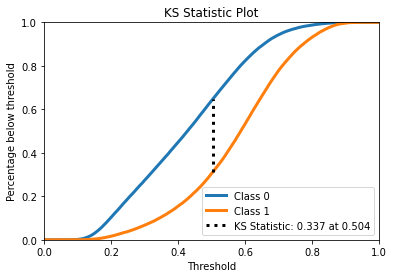

Performance no conjunto de teste:

Accuracy:         0.6679
Recall:           0.6951
Precision:        0.6593
F1:               0.6767
AUROC:            0.7290
AUPR:             0.7120


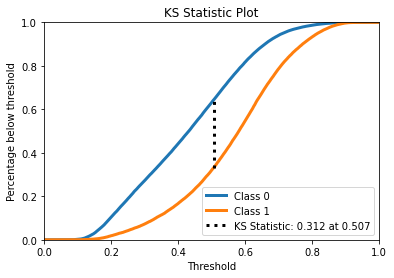

Performance no conjunto de validação:

Accuracy:         0.6556
Recall:           0.6798
Precision:        0.6484
F1:               0.6637
AUROC:            0.7146
AUPR:             0.6979
Trial  2  with parameters  {'n_estimators': 112, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 20, 'criterion': 'friedman_mse', 'learning_rate': 0.15958820887659717}
      Iter       Train Loss   Remaining Time 
         1           1.3613           19.41m
         2           1.3429           19.22m
         3           1.3293           19.09m
         4           1.3179           19.05m
         5           1.3081           18.94m
         6           1.2991           18.81m
         7           1.2926           18.65m
         8           1.2862           18.48m
         9           1.2810           18.33m
        10           1.2763           18.12m
        11           1.2728           17.95m
        12           1.2692           17.72m
        13           1.2657           17.47m


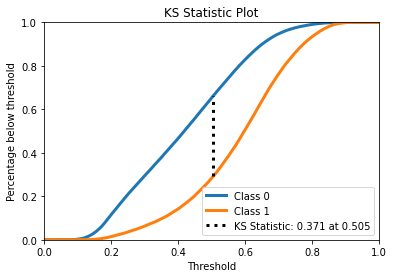

Performance no conjunto de teste:

Accuracy:         0.6847
Recall:           0.7166
Precision:        0.6736
F1:               0.6944
AUROC:            0.7503
AUPR:             0.7347


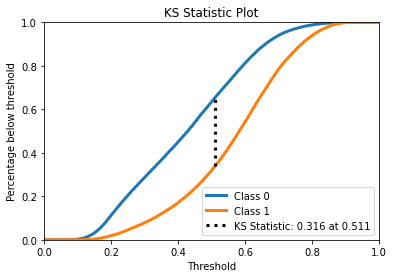

Performance no conjunto de validação:

Accuracy:         0.6574
Recall:           0.6809
Precision:        0.6503
F1:               0.6652
AUROC:            0.7157
AUPR:             0.6986
Trial  3  with parameters  {'n_estimators': 338, 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 38, 'criterion': 'friedman_mse', 'learning_rate': 0.1998484305774081}
      Iter       Train Loss   Remaining Time 
         1           1.3592           47.23m
         2           1.3412           47.03m
         3           1.3273           47.05m
         4           1.3176           46.84m
         5           1.3084           46.84m
         6           1.2992           46.75m
         7           1.2929           46.70m
         8           1.2868           46.57m
         9           1.2822           46.46m
        10           1.2788           46.14m
        11           1.2760           46.01m
        12           1.2730           45.91m
        13           1.2697           45.55m
 

       174           1.1932           21.84m
       175           1.1929           21.70m
       176           1.1926           21.56m
       177           1.1923           21.42m
       178           1.1922           21.28m
       179           1.1920           21.14m
       180           1.1917           21.00m
       181           1.1915           20.87m
       182           1.1914           20.73m
       183           1.1911           20.59m
       184           1.1907           20.46m
       185           1.1905           20.33m
       186           1.1902           20.19m
       187           1.1900           20.05m
       188           1.1899           19.92m
       189           1.1896           19.78m
       190           1.1895           19.65m
       191           1.1893           19.51m
       192           1.1891           19.37m
       193           1.1890           19.23m
       194           1.1887           19.10m
       195           1.1885           18.96m
       196

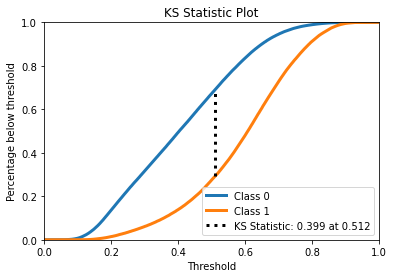

Performance no conjunto de teste:

Accuracy:         0.6987
Recall:           0.7251
Precision:        0.6888
F1:               0.7065
AUROC:            0.7695
AUPR:             0.7568


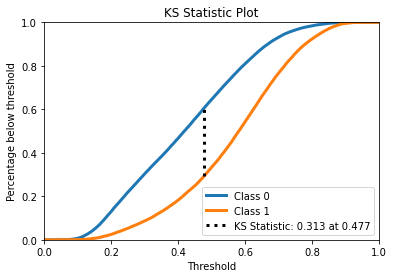

Performance no conjunto de validação:

Accuracy:         0.6558
Recall:           0.6663
Precision:        0.6526
F1:               0.6594
AUROC:            0.7139
AUPR:             0.6968
Trial  4  with parameters  {'n_estimators': 1010, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 19, 'criterion': 'friedman_mse', 'learning_rate': 0.16079126933541393}
      Iter       Train Loss   Remaining Time 
         1           1.3611          176.88m
         2           1.3427          177.38m
         3           1.3290          177.41m
         4           1.3176          178.23m
         5           1.3078          178.81m
         6           1.2988          178.75m
         7           1.2904          178.89m
         8           1.2852          178.50m
         9           1.2800          178.35m
        10           1.2753          177.91m
        11           1.2718          177.73m
        12           1.2680          177.51m
        13           1.2654          176.95m

       174           1.1663          138.80m
       175           1.1659          138.61m
       176           1.1654          138.40m
       177           1.1653          138.21m
       178           1.1650          138.02m
       179           1.1646          137.85m
       180           1.1644          137.66m
       181           1.1641          137.47m
       182           1.1637          137.26m
       183           1.1632          137.05m
       184           1.1627          136.88m
       185           1.1623          136.67m
       186           1.1620          136.48m
       187           1.1616          136.31m
       188           1.1612          136.10m
       189           1.1609          135.90m
       190           1.1604          135.71m
       191           1.1602          135.51m
       192           1.1600          135.34m
       193           1.1597          135.16m
       194           1.1595          134.98m
       195           1.1590          134.78m
       196

       357           1.1086          106.43m
       358           1.1082          106.25m
       359           1.1079          106.08m
       360           1.1075          105.91m
       361           1.1073          105.75m
       362           1.1070          105.58m
       363           1.1066          105.41m
       364           1.1065          105.24m
       365           1.1062          105.07m
       366           1.1059          104.89m
       367           1.1057          104.72m
       368           1.1055          104.55m
       369           1.1052          104.38m
       370           1.1049          104.21m
       371           1.1048          104.04m
       372           1.1046          103.87m
       373           1.1045          103.71m
       374           1.1043          103.54m
       375           1.1040          103.38m
       376           1.1036          103.21m
       377           1.1035          103.04m
       378           1.1031          102.88m
       379

       540           1.0581           76.11m
       541           1.0580           75.95m
       542           1.0577           75.78m
       543           1.0574           75.63m
       544           1.0571           75.46m
       545           1.0568           75.29m
       546           1.0566           75.13m
       547           1.0566           74.96m
       548           1.0565           74.80m
       549           1.0563           74.64m
       550           1.0562           74.48m
       551           1.0560           74.31m
       552           1.0559           74.15m
       553           1.0558           73.99m
       554           1.0555           73.82m
       555           1.0553           73.65m
       556           1.0550           73.50m
       557           1.0546           73.34m
       558           1.0544           73.17m
       559           1.0542           73.01m
       560           1.0539           72.84m
       561           1.0536           72.68m
       562

       723           1.0146           46.34m
       724           1.0144           46.17m
       725           1.0141           46.01m
       726           1.0137           45.85m
       727           1.0134           45.69m
       728           1.0130           45.53m
       729           1.0127           45.37m
       730           1.0125           45.21m
       731           1.0122           45.05m
       732           1.0120           44.89m
       733           1.0118           44.72m
       734           1.0116           44.56m
       735           1.0114           44.40m
       736           1.0112           44.24m
       737           1.0109           44.08m
       738           1.0106           43.92m
       739           1.0103           43.76m
       740           1.0101           43.59m
       741           1.0099           43.43m
       742           1.0096           43.27m
       743           1.0094           43.11m
       744           1.0091           42.95m
       745

       906           0.9747           16.76m
       907           0.9746           16.60m
       908           0.9743           16.44m
       909           0.9740           16.28m
       910           0.9737           16.11m
       911           0.9736           15.95m
       912           0.9733           15.79m
       913           0.9730           15.63m
       914           0.9727           15.47m
       915           0.9726           15.31m
       916           0.9724           15.15m
       917           0.9722           14.99m
       918           0.9718           14.83m
       919           0.9717           14.66m
       920           0.9715           14.50m
       921           0.9712           14.34m
       922           0.9710           14.18m
       923           0.9707           14.02m
       924           0.9705           13.86m
       925           0.9702           13.70m
       926           0.9700           13.54m
       927           0.9697           13.37m
       928

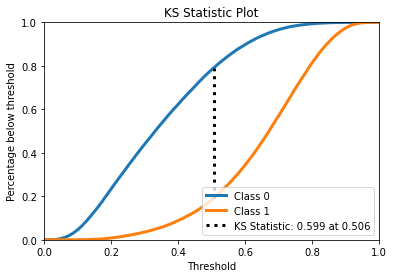

Performance no conjunto de teste:

Accuracy:         0.7993
Recall:           0.8164
Precision:        0.7895
F1:               0.8027
AUROC:            0.8806
AUPR:             0.8784


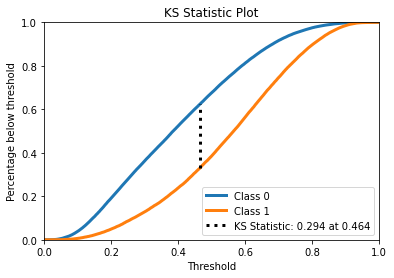

Performance no conjunto de validação:

Accuracy:         0.6455
Recall:           0.6150
Precision:        0.6550
F1:               0.6344
AUROC:            0.7019
AUPR:             0.6848
Trial  5  with parameters  {'n_estimators': 132, 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 55, 'criterion': 'friedman_mse', 'learning_rate': 0.17916997459163148}
      Iter       Train Loss   Remaining Time 
         1           1.3551           27.74m
         2           1.3332           27.36m
         3           1.3172           27.19m
         4           1.3048           27.18m
         5           1.2933           27.10m
         6           1.2826           26.80m
         7           1.2747           26.47m
         8           1.2685           26.22m
         9           1.2629           25.96m
        10           1.2579           25.66m
        11           1.2532           25.45m
        12           1.2497           25.17m
        13           1.2466           24.88m


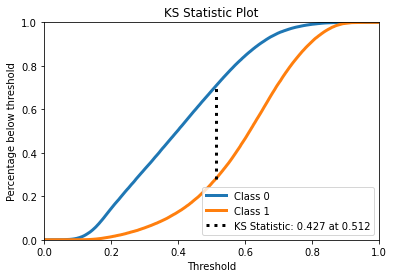

Performance no conjunto de teste:

Accuracy:         0.7129
Recall:           0.7409
Precision:        0.7016
F1:               0.7207
AUROC:            0.7858
AUPR:             0.7744


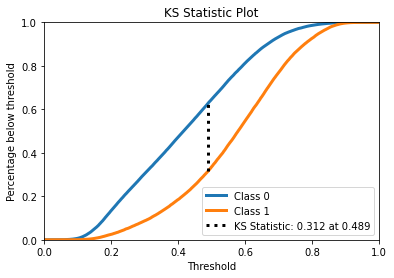

Performance no conjunto de validação:

Accuracy:         0.6552
Recall:           0.6645
Precision:        0.6524
F1:               0.6584
AUROC:            0.7140
AUPR:             0.6972
Trial  6  with parameters  {'n_estimators': 975, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5, 'criterion': 'friedman_mse', 'learning_rate': 0.15124872098721331}
      Iter       Train Loss   Remaining Time 
         1           1.3682          101.59m
         2           1.3549          101.50m
         3           1.3441          101.36m
         4           1.3358          101.38m
         5           1.3289          101.54m
         6           1.3224          101.36m
         7           1.3167          101.44m
         8           1.3119          101.17m
         9           1.3062          101.10m
        10           1.3029          100.87m
        11           1.2975          100.78m
        12           1.2946          100.69m
        13           1.2921          100.44m
 

       174           1.2271           79.10m
       175           1.2270           79.00m
       176           1.2268           78.89m
       177           1.2267           78.78m
       178           1.2266           78.67m
       179           1.2265           78.56m
       180           1.2264           78.45m
       181           1.2263           78.34m
       182           1.2262           78.23m
       183           1.2261           78.12m
       184           1.2260           78.01m
       185           1.2259           77.91m
       186           1.2257           77.80m
       187           1.2256           77.68m
       188           1.2254           77.57m
       189           1.2253           77.46m
       190           1.2252           77.35m
       191           1.2251           77.24m
       192           1.2251           77.13m
       193           1.2250           77.02m
       194           1.2249           76.92m
       195           1.2247           76.81m
       196

       357           1.2077           60.27m
       358           1.2076           60.17m
       359           1.2075           60.07m
       360           1.2074           59.97m
       361           1.2073           59.87m
       362           1.2073           59.77m
       363           1.2072           59.67m
       364           1.2072           59.57m
       365           1.2071           59.47m
       366           1.2071           59.37m
       367           1.2070           59.27m
       368           1.2069           59.17m
       369           1.2068           59.07m
       370           1.2067           58.98m
       371           1.2066           58.87m
       372           1.2066           58.77m
       373           1.2065           58.67m
       374           1.2064           58.57m
       375           1.2063           58.46m
       376           1.2062           58.36m
       377           1.2061           58.26m
       378           1.2060           58.16m
       379

       540           1.1930           42.23m
       541           1.1930           42.13m
       542           1.1929           42.03m
       543           1.1928           41.93m
       544           1.1927           41.83m
       545           1.1926           41.73m
       546           1.1925           41.64m
       547           1.1925           41.54m
       548           1.1924           41.44m
       549           1.1923           41.34m
       550           1.1922           41.24m
       551           1.1921           41.15m
       552           1.1920           41.05m
       553           1.1919           40.95m
       554           1.1919           40.85m
       555           1.1918           40.75m
       556           1.1917           40.66m
       557           1.1916           40.56m
       558           1.1914           40.47m
       559           1.1912           40.37m
       560           1.1911           40.27m
       561           1.1910           40.17m
       562

       723           1.1788           24.40m
       724           1.1787           24.30m
       725           1.1786           24.20m
       726           1.1785           24.11m
       727           1.1785           24.01m
       728           1.1784           23.91m
       729           1.1783           23.82m
       730           1.1783           23.72m
       731           1.1782           23.62m
       732           1.1782           23.53m
       733           1.1781           23.43m
       734           1.1781           23.33m
       735           1.1780           23.24m
       736           1.1779           23.14m
       737           1.1779           23.04m
       738           1.1778           22.94m
       739           1.1777           22.85m
       740           1.1776           22.75m
       741           1.1776           22.65m
       742           1.1775           22.55m
       743           1.1774           22.46m
       744           1.1772           22.36m
       745

       906           1.1661            6.67m
       907           1.1659            6.57m
       908           1.1659            6.48m
       909           1.1658            6.38m
       910           1.1657            6.28m
       911           1.1656            6.19m
       912           1.1656            6.09m
       913           1.1655            5.99m
       914           1.1654            5.90m
       915           1.1653            5.80m
       916           1.1653            5.70m
       917           1.1652            5.61m
       918           1.1651            5.51m
       919           1.1650            5.41m
       920           1.1650            5.32m
       921           1.1649            5.22m
       922           1.1648            5.12m
       923           1.1648            5.03m
       924           1.1648            4.93m
       925           1.1647            4.83m
       926           1.1646            4.74m
       927           1.1646            4.64m
       928

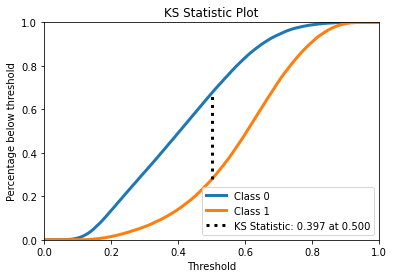

Performance no conjunto de teste:

Accuracy:         0.6983
Recall:           0.7226
Precision:        0.6892
F1:               0.7055
AUROC:            0.7674
AUPR:             0.7541


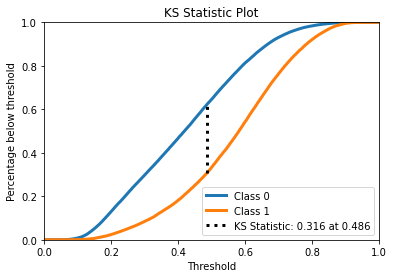

Performance no conjunto de validação:

Accuracy:         0.6563
Recall:           0.6667
Precision:        0.6531
F1:               0.6598
AUROC:            0.7149
AUPR:             0.6977
Trial  7  with parameters  {'n_estimators': 145, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 51, 'criterion': 'friedman_mse', 'learning_rate': 0.1152525152154871}
      Iter       Train Loss   Remaining Time 
         1           1.3699           20.11m
         2           1.3570           19.96m
         3           1.3465           19.79m
         4           1.3374           19.70m
         5           1.3301           19.58m
         6           1.3237           19.35m
         7           1.3180           19.13m
         8           1.3122           18.94m
         9           1.3078           18.76m
        10           1.3027           18.58m
        11           1.2987           18.43m
        12           1.2953           18.25m
        13           1.2913           18.08m
 

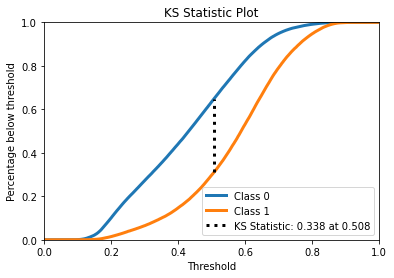

Performance no conjunto de teste:

Accuracy:         0.6686
Recall:           0.7027
Precision:        0.6578
F1:               0.6795
AUROC:            0.7308
AUPR:             0.7142


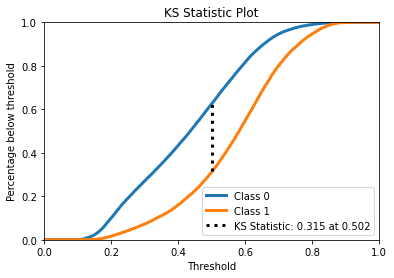

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Performance no conjunto de validação:

Accuracy:         0.6573
Recall:           0.6892
Precision:        0.6478
F1:               0.6679
AUROC:            0.7152
AUPR:             0.6987


Trial  8  with parameters  {'n_estimators': 112, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 20, 'criterion': 'friedman_mse', 'learning_rate': 0.15958821564625797}
      Iter       Train Loss   Remaining Time 
         1           1.3613           19.51m
         2           1.3429           19.36m
         3           1.3293           19.17m
         4           1.3179           19.10m
         5           1.3081           19.00m
         6           1.2991           18.85m
         7           1.2926           18.72m
         8           1.2862           18.56m
         9           1.2810           18.43m
        10           1.2763           18.21m
        11           1.2728           18.04m
        12           1.2692           17.86m
        13           1.2657           17.66m
        14           1.2628           17.47m
        15           1.2600           17.30m
        16           1.2573           17.13m
        17           1.2554           16.92m
        1

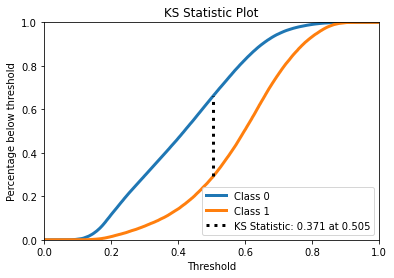

Performance no conjunto de teste:

Accuracy:         0.6847
Recall:           0.7166
Precision:        0.6736
F1:               0.6944
AUROC:            0.7503
AUPR:             0.7347


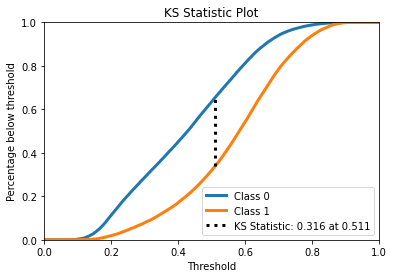

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Performance no conjunto de validação:

Accuracy:         0.6574
Recall:           0.6809
Precision:        0.6503
F1:               0.6653
AUROC:            0.7158
AUPR:             0.6987
Trial  9  with parameters  {'n_estimators': 124, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 22, 'criterion': 'friedman_mse', 'learning_rate': 0.06912705505173104}
      Iter       Train Loss   Remaining Time 
         1           1.3777           12.86m
         2           1.3702           12.74m
         3           1.3636           12.66m
         4           1.3576           12.58m
         5           1.3524           12.48m
         6           1.3477           12.38m
         7           1.3430           12.23m
         8           1.3392           12.12m
         9           1.3351           12.02m
        10           1.3318           11.95m
        11           1.3285           11.85m
        12           1.3258           11.75m
        13           1.3230           11.65m


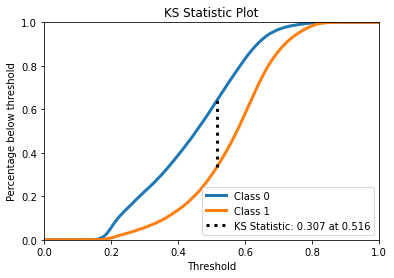

Performance no conjunto de teste:

Accuracy:         0.6523
Recall:           0.7014
Precision:        0.6386
F1:               0.6686
AUROC:            0.7102
AUPR:             0.6922


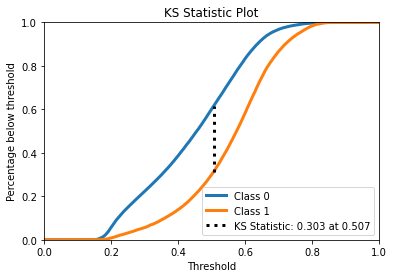

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Performance no conjunto de validação:

Accuracy:         0.6505
Recall:           0.7005
Precision:        0.6369
F1:               0.6672
AUROC:            0.7078
AUPR:             0.6910
Trial  10  with parameters  {'n_estimators': 112, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 20, 'criterion': 'friedman_mse', 'learning_rate': 0.16229421213850412}
      Iter       Train Loss   Remaining Time 
         1           1.3609           19.35m
         2           1.3423           19.32m
         3           1.3286           19.14m
         4           1.3172           19.06m
         5           1.3074           19.04m
         6           1.2984           18.90m
         7           1.2900           18.78m
         8           1.2848           18.58m
         9           1.2797           18.42m
        10           1.2750           18.21m
        11           1.2715           18.04m
        12           1.2677           17.86m
        13           1.2651           17.64m

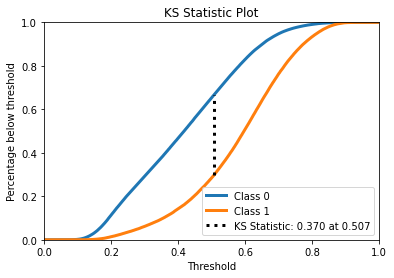

Performance no conjunto de teste:

Accuracy:         0.6843
Recall:           0.7152
Precision:        0.6735
F1:               0.6937
AUROC:            0.7504
AUPR:             0.7350


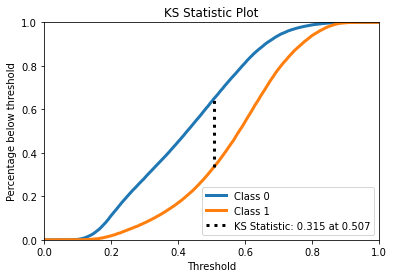

Performance no conjunto de validação:

Accuracy:         0.6568
Recall:           0.6782
Precision:        0.6503
F1:               0.6640
AUROC:            0.7159
AUPR:             0.6989
{'Trial-ID': 8, 'Iteration': 1, 'criterion': 'friedman_mse', 'learning_rate': 0.15958821564625797, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 112, 'Objective': 0.6573735789886319}


In [21]:
# without cross validation
study = sherpa.Study(parameters=parameters,
                     algorithm=algorithm,
                     lower_is_better=False,
                    disable_dashboard=True)

for trial in study:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    gb_clf = GradientBoostingClassifier(criterion=trial.parameters['criterion'],
                                 max_depth=trial.parameters['max_depth'],
                                 min_samples_leaf=trial.parameters['min_samples_leaf'],
                                 min_samples_split=trial.parameters['min_samples_split'],
                                 learning_rate=trial.parameters['learning_rate'],
                                 n_estimators=trial.parameters['n_estimators'],
                                 verbose=2,
                                 random_state=0)
    gb_clf.fit(train_X, train_Y)
    gb_pred_class = gb_clf.predict(train_X)
    gb_pred_scores = gb_clf.predict_proba(train_X)
    accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(train_Y, gb_pred_class, gb_pred_scores)
    print('Performance no conjunto de teste:')
    print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

    gb_pred_class = gb_clf.predict(validation_X)
    gb_pred_scores = gb_clf.predict_proba(validation_X)
    accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(validation_Y, gb_pred_class, gb_pred_scores)
    print('Performance no conjunto de validação:')
    print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
    study.add_observation(trial,
                          iteration=1,
                          objective=accuracy)
    study.finalize(trial)
print(study.get_best_result())